#### Topic:      Prework Solutions
#### Cohort:   03_Spring2015
#### Date:        01-Apr-2015
#### Author:     Reshama Shaikh

Prework: Required Exercises

https://github.com/datascopeanalytics/metis-data-science-bootcamp-prework/blob/master/exercises.md

Source:     Think Stats (section Using the Code), there is some accompanying code and data. You can get these from the Think Stats repository.
https://github.com/AllenDowney/ThinkStats2

------------------------------------------------------------------------------- 

####Note:

Step1.  Create a directory on your computer.  Below is an example:

/Users/reshamashaikh/ds/metis/metisgh/

Step2.  use GitHub to pull this repo to your computer

git clone https://github.com/AllenDowney/ThinkStats2.git

Step3.  Put your ipython notebook in this directory (that way, it can pull the needed dependencies):  

/Users/reshamashaikh/ds/metis/metisgh/ThinkStats2/code/

(content will match:  https://github.com/AllenDowney/ThinkStats2/tree/master/code )

Step4.  Call your prework solutions notebook:  

0_S_Prework_myname.ipynb

##Table of Contents 
[Exercise01](#1) 

(Think Stats Ex 2.4) 

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length?
 

[Exercise02](#2)

(Think Stats Ex 3.1) 

Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the number of children under 18 in the household.
Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means. As a starting place, you can use chap03ex.ipynb. This is an ipython notebook from the ThinkStats2 repository.


[Exercise03](#3)

(Think Stats Ex 4.2) 

The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.
Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?



[Exercise04](#4)

(Think Stats Ex 7.1) 

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

[Exercise05](#5)

(Think Stats Ex 8.2)

Suppose that you draw a sample with size n = 10 from an exponential distribution with λ = 2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of n and make a plot of standard error versus n.


[Exercise06](#6)

(Think Stats Ex 2.1 Bayes)

The cookie problem is a problem discussed in sections 1.3, 2.2 and 2.3 of Think Bayes. Solve the following problem. In Section 2.3 I said that the solution to the cookie problem generalizes to the case where we draw multiple cookies with replacement. But in the more likely scenario where we eat the cookies we draw, the likelihood of each draw depends on the previous draws.

Modify the solution in this chapter to handle selection without replacement. Hint: add instance variables to Cookie to represent the hypothetical state of the bowls, and modify Likelihood accordingly. You might want to define a Bowl object.


-----------------------------------------------------------------------------------------

### <a id='1'></a> Exercise 1 
(Think Stats Ex 2.4)

a) Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. 

b) Compute Cohen’s d to quantify the difference between the groups. 

c) How does it compare to the difference in pregnancy length?

Note:  Cohen's d is an effect size used to indicate the standardised difference between two means. It can be used, for example, to accompany reporting of t-test and ANOVA results. 

In [1]:
# set working directory
path_data = "/Users/Rocket/ds3/00-prework/ThinkStats2"

In [3]:
import nsfg
df = nsfg.ReadFemPreg()
print "Length of df: ", len(df)
df.tail()

Length of df:  13593


,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
13588,12571,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4670.540953,5795.69288,6269.200989,1,78,NaN,6.1875
13589,12571,2,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,...,0,0,0,4670.540953,5795.69288,6269.200989,1,78,NaN,NaN
13590,12571,3,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,...,0,0,0,4670.540953,5795.69288,6269.200989,1,78,NaN,NaN
13591,12571,4,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4670.540953,5795.69288,6269.200989,1,78,NaN,7.5000
13592,12571,5,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4670.540953,5795.69288,6269.200989,1,78,NaN,7.5000


In [ ]:
firsts = df[df.birthord==1]
others = df[df.birthord>1]
print "len of firsts: ", len(firsts)
print "len of others: ", len(others)

In [6]:
print "firsts total birth wt (mean): ", firsts.totalwgt_lb.mean()
print "others total birth wt (mean): ", others.totalwgt_lb.mean()

firsts total birth wt (mean):  7.20109443044
others total birth wt (mean):  7.32585561497


####Question: 1a) Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others.
####Answer:   first birth is lighter than others.
####First babies are lighter than others (7.20 vs 7.33 lbs)

In [31]:
#b) Compute Cohen’s D to quantify the difference between the groups. 

# Cohen's D function
import numpy as np

def CohenD(grp1, grp2):
    diff = np.mean(grp1) - np.mean(grp2)
    var1 = np.var(grp1)
    var2 = np.var(grp2)
    n1, n2 = len(grp1), len(grp2)
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    cohen = diff / np.sqrt(pooled_var)
    
    print "Computing Cohen D statistic"
    return cohen

cohen_birth_weight = CohenD(firsts.totalwgt_lb, others.totalwgt_lb)
cohen_prglngth = CohenD(firsts.prglngth, others.prglngth)

print cohen_birth_weight 
print cohen_prglngth
    
    
    

Computing Cohen D statistic
Computing Cohen D statistic
-0.0886827459471
0.0288822092882


####Answer:  -0.0886827459471

####Cohen's D is:  -0.0887

c) How does Cohen's D compare to the difference in pregnancy length? 

In [33]:
print "Cohen's D for birth weight is: " + str(cohen_birth_weight)
print "Cohen's D for pregnancy length is: " + str(cohen_prglngth)

Cohen's D for birth weight is: -0.0886827459471
Cohen's D for pregnancy length is: 0.0288822092882


####Interpretation
This site has a good interpretation of Cohen's D, effect size:
http://www.uccs.edu/lbecker/effect-size.html

[fill in ] 

-------------------------------------------------------------------------------------------

### <a id='2'></a> Exercise 2 
(Think Stats Ex 3.1)

Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the number of children under 18 in the household.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means. As a starting place, you can use chap03ex.ipynb. This is an ipython notebook from the ThinkStats2 repository.

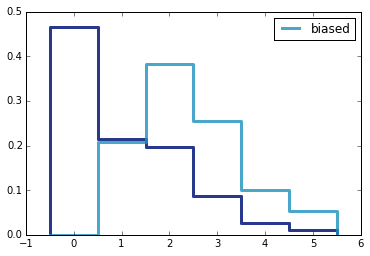

In [38]:
import chap01soln
resp = chap01soln.ReadFemResp()
%matplotlib inline

import thinkstats2
pmf = thinkstats2.Pmf(resp.numkdhh) ## generate PMF dictionary

import thinkplot
thinkplot.Pmfs([pmf])

def BiasPmf(pmf, label=''):
    """Returns the Pmf with oversampling proportional to value.
For each class size, x, we multiply the probability by x, the number of stu- dents who observe that class size.
pmf: Pmf object, label: string label for the new Pmf.
Returns: Pmf object
    """
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

bias_pmf = BiasPmf(pmf, label='biased')

thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, bias_pmf])
thinkplot.Show()

-------------------------------------------------------------------------------------------

### <a id='3'></a> Exercise 3 
(Think Stats Ex 4.2)

The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.
Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?

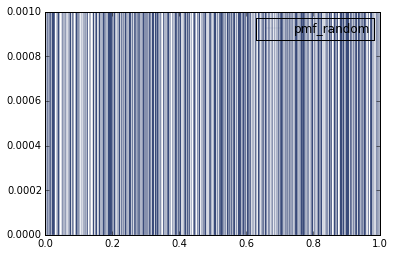

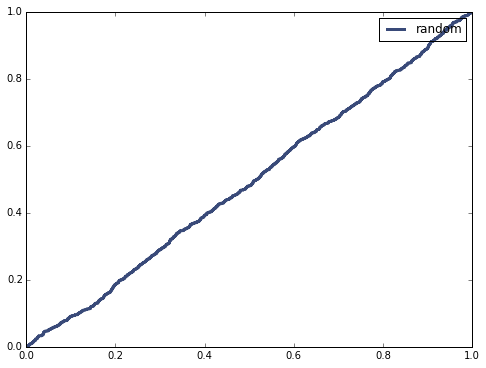

In [53]:
import thinkstats2

sample = np.random.random(1000)

pmf = thinkstats2.Pmf(sample) ## generate PMF dictionary
#print pmf

cdf = thinkstats2.Cdf(sample, label='random')
#print cdf

thinkplot.Pmf(pmf, label='pmf_random', linewidth=0.1)
thinkplot.Show()

thinkplot.Cdf(cdf)
thinkplot.Show()

####Answer:
Yes, distribution looks uniform

-------------------------------------------------------------------------------------------

### <a id='4'></a> Exercise 4 
(Think Stats Ex 7.1)

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

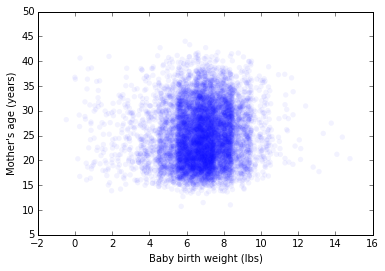

In [41]:
import nsfg
import thinkstats2
import thinkplot
%matplotlib inline

df = nsfg.ReadFemPreg()
#sample = thinkstats2.SampleRows(df, 5000)   #choose random subset
#sample = df
sample = df.dropna(subset=['agepreg', 'birthwgt_lb'])  #remove na from these variables

mom_age = sample.agepreg
baby_lb = sample.birthwgt_lb

baby_lb = thinkstats2.Jitter(baby_lb, 0.5)
mom_age = thinkstats2.Jitter(mom_age, 0.5)

thinkplot.Scatter(baby_lb, mom_age, alpha=0.05)
thinkplot.Config(xlabel="Baby birth weight (lbs)", ylabel="Mother's age (years)")
thinkplot.Show()

In [33]:
pearson_corr = thinkstats2.Corr(baby_lb, mom_age)
spearman_corr = thinkstats2.SpearmanCorr(baby_lb, mom_age)

print pearson_corr
print spearman_corr

0.0683543116417
0.0937948740431


In [68]:
#thinkplot.HexBin(baby_lb, mom_age)
#thinkplot.Show()

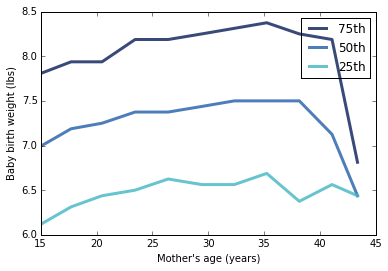

In [40]:
import numpy as np
def BinnedPercentiles(df):
    """Bin the data by age and plot percentiles of weight for each bin.
    df: DataFrame
    """
    bins = np.arange(10, 48, 3)
    indices = np.digitize(df.agepreg, bins)
    groups = df.groupby(indices)

    ages = [group.agepreg.mean() for i, group in groups][1:-1]
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

    thinkplot.PrePlot(3)
    for percent in [75, 50, 25]:
        weights = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(ages, weights, label=label)
    thinkplot.Config(xlabel="Mother's age (years)", ylabel="Baby birth weight (lbs)")
    thinkplot.Show()
    
BinnedPercentiles(df)

####Answer:
For the Pearson r correlation, both variables should be normally distributed.  Other assumptions include linearity and homoscedasticity.  Linearity assumes a straight line relationship between each of the variables in the analysis and homoscedasticity assumes that data is normally distributed about the regression line.

Spearman rank correlation test does not make any assumptions about the distribution. 

####Conclusions:
Data seem to be not related.

-----------------------------------------------------------------------------------------

### <a id='5'></a> Exercise 5
(Think Stats Ex 8.2)

Suppose that you draw a sample with size n = 10 from an exponential distribution with λ = 2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of n and make a plot of standard error versus n.

Starndard error: 0.825284632541
90% confidence interval(1.2443159179804506, 3.6715264744319294)

Repeat the experiment with a few different values of n 
Starndard error: 0.843247490056
90% confidence interval(1.3017938264227855, 3.793573279515932)
Starndard error: 0.390673068735
90% confidence interval(1.5225946807244413, 2.7568398361585396)
Starndard error: 0.20700146303
90% confidence interval(1.6978555702917362, 2.3812517942715865)
Starndard error: 0.124567252424
90% confidence interval(1.8133388622344744, 2.2122531860463832)
Starndard error: 0.0690905905026
90% confidence interval(1.878089141994475, 2.1124828188234259)
Starndard error: 0.0414617945947
90% confidence interval(1.9320027260298602, 2.0701397748799377)


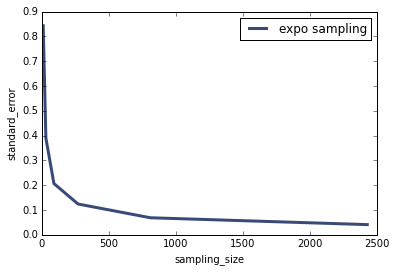

In [67]:
import thinkstats2

def RMSE(estimates, actual):
    e2 = [(estimate - actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

def expo_sampling(n, m):
    lam = 2
    means = []
    for _ in range(m):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        means.append(L)
    
    cdf = thinkstats2.Cdf(means)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    standard_error = RMSE(means, lam)
    
    print "Starndard error: " + str(standard_error) 
    print "90% confidence interval" + str(ci)
    return standard_error

expo_sampling(n=10, m=1000)
print ""
print "Repeat the experiment with a few different values of n "
sampling_size = [10, 30, 90, 270, 810, 2430]
error_list = [expo_sampling(x,1000) for x in sampling_size ]

thinkplot.Plot(sampling_size, error_list, label='expo sampling')
thinkplot.Config(xlabel="sampling_size", ylabel="standard_error")
thinkplot.Show()

-----------------------------------------------------------------------------------------

### <a id='6'></a> Exercise 6
(Think Stats Ex 2.1 Bayes)

The cookie problem is a problem discussed in sections 1.3, 2.2 and 2.3 of Think Bayes. Solve the following problem. In Section 2.3 I said that the solution to the cookie problem generalizes to the case where we draw multiple cookies with replacement. But in the more likely scenario where we eat the cookies we draw, the likelihood of each draw depends on the previous draws.

Modify the solution in this chapter to handle selection without replacement. Hint: add instance variables to Cookie to represent the hypothetical state of the bowls, and modify Likelihood accordingly. You might want to define a Bowl object.

In [1]:
# get this file from:  https://github.com/AllenDowney/ThinkBayes/blob/master/thinkbayes.py
from thinkbayes import Pmf
pmf = Pmf()
pmf.Set('Bowl 1', 0.5)
pmf.Set('Bowl 2', 0.5)

pmf.Mult('Bowl 1', 0.75)
pmf.Mult('Bowl 2', 0.5)

pmf.Normalize()

print pmf.Prob('Bowl 1')

0.6


In [7]:
class Cookie(Pmf):
    
    def __init__(self, hypos):
        Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, 1)
        self.Normalize()
        
    def Update(self, data):
        for hypo in self.Values():
            like = self.Likelihood(data, hypo)
            self.Mult(hypo, like)
        self.Normalize()
    
    mixes = {
        'Bowl_1':dict(vanilla=0.75, chocolate=0.25),
        'Bowl_2':dict(vanilla=0.5, chocolate=0.5)}
    
    def Likelihood(self, data, hypo):
        mix = self.mixes[hypo]
        like = mix[data]
        return like
        
hypos = ['Bowl_1', 'Bowl_2']
pmf = Cookie(hypos)
pmf.Update('vanilla')

#dataset = ['vanilla', 'chocolate', 'vanilla']
#for data in dataset:
#    pmf.Update


for hypo, prob in pmf.Items():
    print hypo, prob

Bowl_2 0.4
Bowl_1 0.6


In [10]:
class Cookie(Pmf):
        
    def __init__(self, hypos):
        Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, 1)
        self.Normalize()
        
    def Update(self, data):
        for hypo in self.Values():
            like = self.Likelihood(data, hypo)
            self.Mult(hypo, like)
        self.Normalize()
    
    #mixes = {
    #    'Bowl_1':dict(vanilla=0.75, chocolate=0.25),
    #    'Bowl_2':dict(vanilla=0.5, chocolate=0.5)}
    b1_vani = float(30)/40
    b1_choc = 1 - b1_vani
    b2_vani = float(20)/40
    b2_choc = 1 - b2_choc
    mixes = {
        'Bowl_1':dict(vanilla=b1_vani, chocolate=b1_choc),
        'Bowl_2':dict(vanilla=b2_vani, chocolate=b2_choc)}
    
    def Likelihood(self, data, hypo):
        mix = self.mixes[hypo]
        like = mix[data]
        return like
        
hypos = ['Bowl_1', 'Bowl_2']
pmf = Cookie(hypos)


pmf.Update('vanilla')  # vanilla
print "probability after you pick vanilla"
for hypo, prob in pmf.Items():
    print hypo, prob

pick = [[1,1],[1,2],[2,1],[2,2]]
for i, j in pick:
    if i==1 and j==1:
        b1_vani = float(30-1)/(39)
        b1_choc = 1 - b1_vani
        b2_vani = float(20-1)/(39)
        b2_choc = 1 - b2_vani
        pmf.Update('chocolate')  # vanilla-chocolate
        print "probability after you pick vanilla-chocolate" 
        for hypo, prob in pmf.Items():
            print hypo, prob
        b1_vani = 1 - b1_choc
        b1_choc = float(10-1)/(38)
        b2_vani = 1 - b2_choc
        b2_choc = float(20-1)/(38)
        pmf.Update('vanilla')  # vanilla-chocolate-vanilla
        print "probability after you pick vanilla-chocolate-vanilla"
        for hypo, prob in pmf.Items():
            print hypo, prob
    else:
        pass

probability after you pick vanilla
Bowl_2 0.4
Bowl_1 0.6
probability after you pick vanilla-chocolate
Bowl_2 0.571428571429
Bowl_1 0.428571428571
probability after you pick vanilla-chocolate-vanilla
Bowl_2 0.470588235294
Bowl_1 0.529411764706
